In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [36]:
raw_data=pd.read_csv("../dataset/data_jarak2.csv")

In [37]:
raw_data.head()

,No,Nomor Resi,ExtID,Kota Penerima,Kantor Asal,Kantor Tujuan,Bea Dasar,Htnb,Total,Harga Barang,Berat Kiriman,Produk,Tanggal Kirim,Isi Kiriman,Kota,longitude,latitude,Jarak (KM)
0,3.00,LPU19128662xxxx,NaN,"kota banjarmasin,banjarmasin tengah,kertak bar...",KC AMUNTAI 71400,DC BANJARMASIN 70006,"5,000.00",0.00,"5,000.00",NaN,0.10,PPB_SRT,2023-01-10 14:43:37,NaN,kota banjarmasin,114.59,-3.32,123.70
1,4.00,LPU19128662xxxx,NaN,"kabupaten hulu sungai utara,amuntai tengah,har...",KC AMUNTAI 71400,KC AMUNTAI 71400,"3,500.00",0.00,"3,500.00",NaN,0.10,PPB_SRT,2023-01-10 14:42:45,NaN,kabupaten hulu sungai utara,115.13,-2.45,12.44
2,5.00,LPU19128662xxxx,NaN,"kota banjarmasin,banjarmasin timur,karang mekar",KC AMUNTAI 71400,DC BANJARMASIN 70006,"5,000.00",0.00,"5,000.00",NaN,0.10,PPB_SRT,2023-01-10 14:40:05,NaN,kota banjarmasin,114.59,-3.32,123.70
3,6.00,LPU19128662xxxx,NaN,"kabupaten hulu sungai utara,amuntai tengah,tan...",KC AMUNTAI 71400,KC AMUNTAI 71400,"3,500.00",0.00,"3,500.00",NaN,0.10,PPB_SRT,2023-01-10 14:44:13,NaN,kabupaten hulu sungai utara,115.13,-2.45,12.44
4,7.00,P230102000xxxx,NaN,"kota tangerang,ciledug sudimara barat",KC AMUNTAI 71400,KCP CILEDUGTANGERANG 15157,"34,000.00",960.00,"34,960.00","400,000.00",1.00,PKH,2023-01-02 06:53:15,GIGI,kota tangerang,106.63,-6.18,"1,042.30"


In [38]:
raw_data.shape

(3436, 18)

In [39]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436 entries, 0 to 3435
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             3436 non-null   float64
 1   Nomor Resi     3436 non-null   object 
 2   ExtID          2256 non-null   object 
 3   Kota Penerima  3436 non-null   object 
 4   Kantor Asal    3436 non-null   object 
 5   Kantor Tujuan  3435 non-null   object 
 6   Bea Dasar      3436 non-null   float64
 7   Htnb           3436 non-null   float64
 8   Total          3436 non-null   float64
 9   Harga Barang   3370 non-null   float64
 10  Berat Kiriman  3436 non-null   float64
 11  Produk         3436 non-null   object 
 12  Tanggal Kirim  3436 non-null   object 
 13  Isi Kiriman    3432 non-null   object 
 14  Kota           3436 non-null   object 
 15  longitude      3436 non-null   float64
 16  latitude       3436 non-null   float64
 17  Jarak (KM)     3436 non-null   float64
dtypes: float

In [40]:
# Mengatur tampilan float agar tidak menggunakan notasi ilmiah dan menampilkan 2 desimal
pd.options.display.float_format = '{:,.2f}'.format

raw_data.describe()

,No,Bea Dasar,Htnb,Total,Harga Barang,Berat Kiriman,longitude,latitude,Jarak (KM)
count,"3,436.00","3,436.00","3,436.00","3,436.00","3,370.00","3,436.00","3,436.00","3,436.00","3,436.00"
mean,"1,721.36","31,171.71",424.09,"31,595.81","244,695.62",1.10,113.94,-3.31,282.70
std,993.37,"96,432.58","1,724.47","97,713.19","720,626.25",7.03,3.26,1.92,356.77
min,3.00,"3,500.00",0.00,"3,500.00",0.00,0.00,95.33,-10.22,12.44
25%,860.75,"9,000.00",0.00,"9,960.00","44,000.00",0.10,114.59,-3.42,65.59
50%,"1,720.50","13,500.00",0.00,"14,000.00","132,249.00",0.24,114.83,-3.32,123.70
75%,"2,581.25","33,125.00",500.00,"33,500.00","299,975.00",1.00,115.42,-2.33,292.02
max,"3,446.00","1,961,000.00","36,000.00","1,985,000.00","15,000,000.00",120.00,131.25,5.54,"2,381.85"


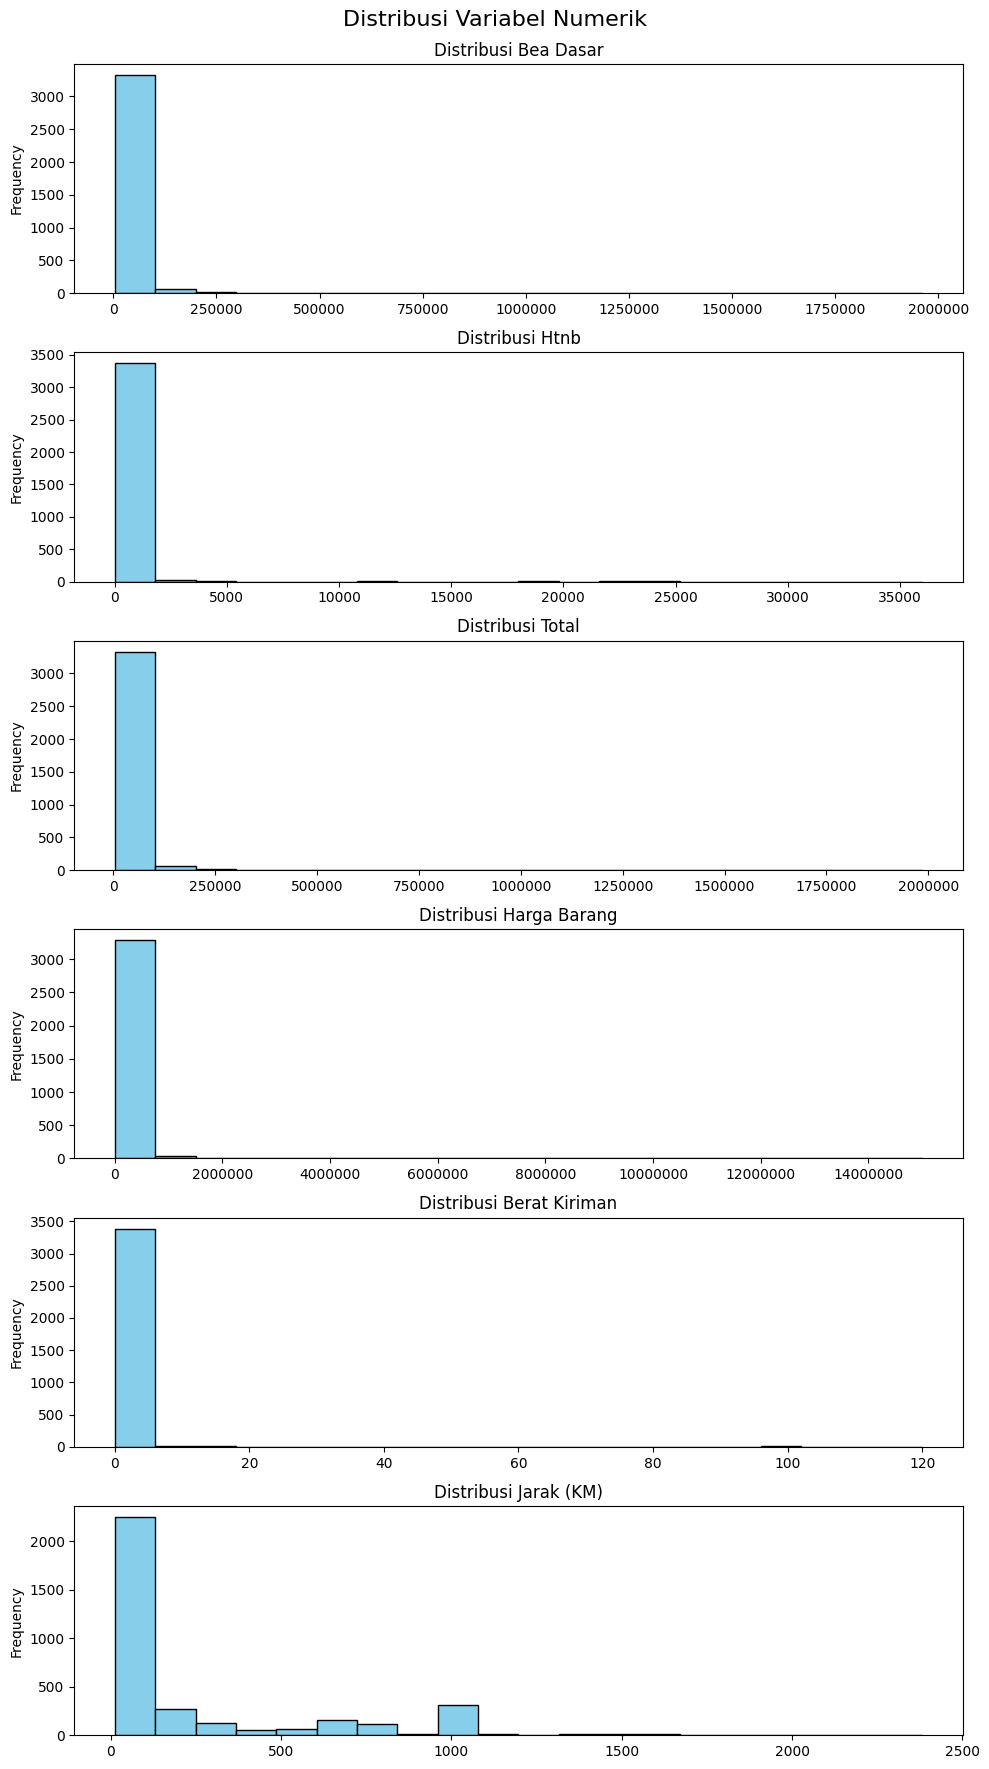

In [41]:
# Daftar kolom numerik
numeric_columns = ['Bea Dasar', 'Htnb', 'Total', 'Harga Barang', 'Berat Kiriman', 'Jarak (KM)']

# Membuat histogram untuk variabel numerik
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, len(numeric_columns) * 3))

for i, col in enumerate(numeric_columns):
    ax = axes[i]
    raw_data[col].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(f'Distribusi {col}')
    ax.ticklabel_format(style='plain')  # Menghindari notasi ilmiah untuk sumbu x
    ax.set_xlabel('')  # Opsional: Menghapus label sumbu x jika tidak diperlukan

plt.tight_layout()
plt.suptitle('Distribusi Variabel Numerik', fontsize=16)
plt.subplots_adjust(top=0.95)  # Menyesuaikan supaya judul tidak bertumpang tindih
plt.show()

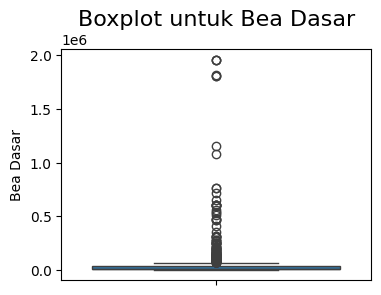

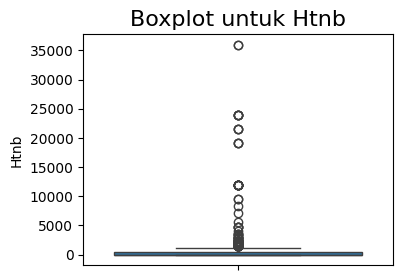

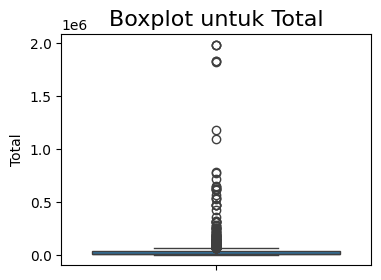

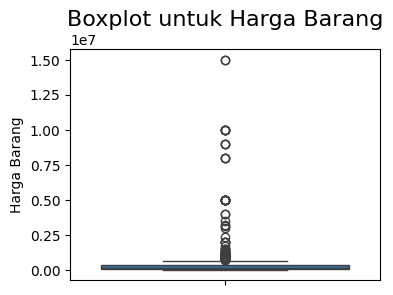

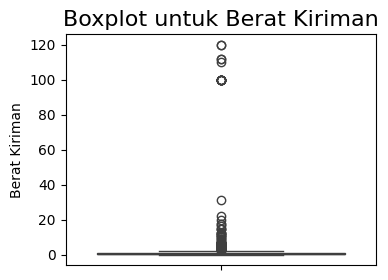

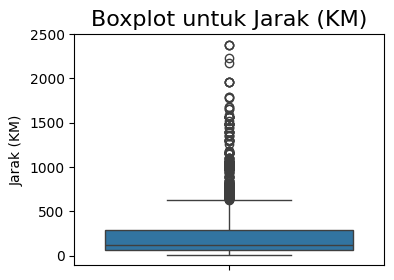

In [42]:
import seaborn as sns

# Membuat boxplot untuk variabel numerik
for col in numeric_columns:
    plt.figure(figsize=(4, 3))
    sns.boxplot(y=raw_data[col])
    plt.title(f'Boxplot untuk {col}', fontsize=16)
    plt.show()

In [43]:
# Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = raw_data[numeric_columns].quantile(0.25)
Q3 = raw_data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Menghapus outliers
data_1 = raw_data[~((raw_data[numeric_columns] < (Q1 - 1.5 * IQR)) | (raw_data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


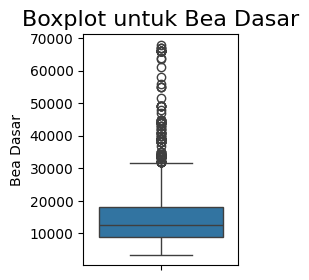

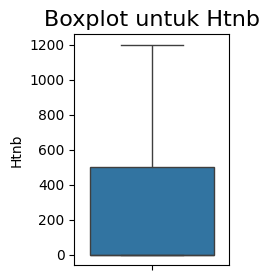

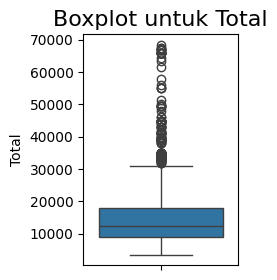

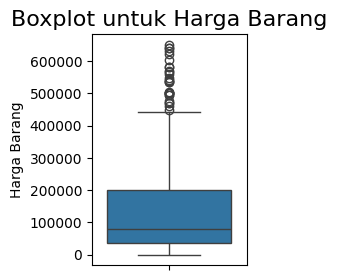

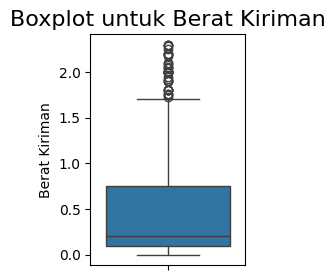

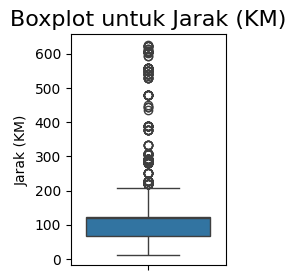

In [44]:
# Membuat boxplot untuk variabel numerik
for col in numeric_columns:
    plt.figure(figsize=(2, 3))
    sns.boxplot(y=data_1[col])
    plt.title(f'Boxplot untuk {col}', fontsize=16)
    plt.show()

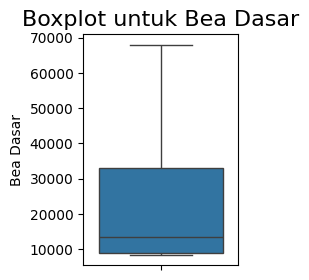

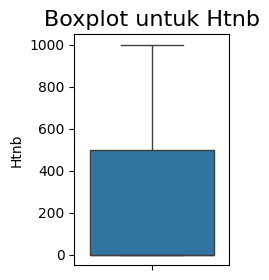

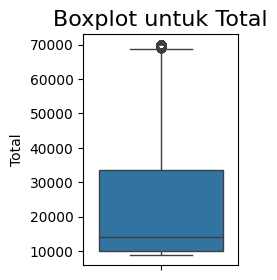

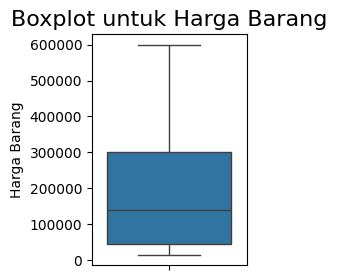

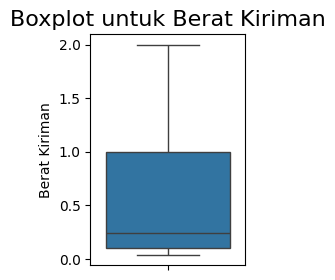

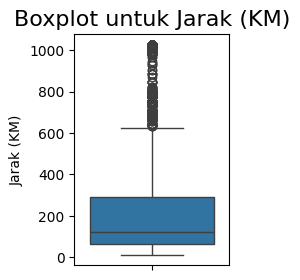

In [45]:
from scipy.stats.mstats import winsorize

# Winsorizing (memotong outliers)
df_winsorized = raw_data.copy()
df_winsorized = df_winsorized[numeric_columns].apply(lambda x: winsorize(x, limits=[0.05, 0.05]))
# Membuat boxplot untuk variabel numerik
for col in numeric_columns:
    plt.figure(figsize=(2, 3))
    sns.boxplot(y=df_winsorized[col])
    plt.title(f'Boxplot untuk {col}', fontsize=16)
    plt.show()

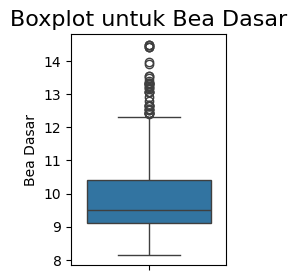

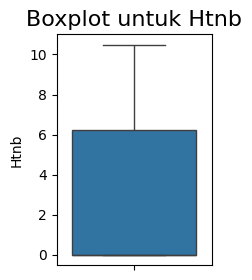

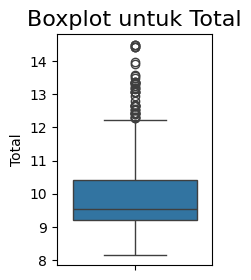

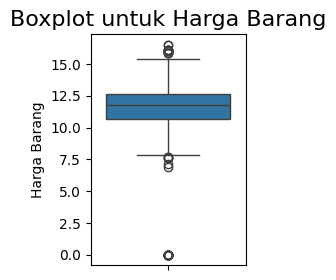

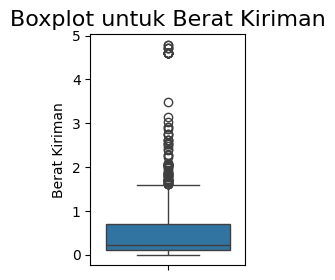

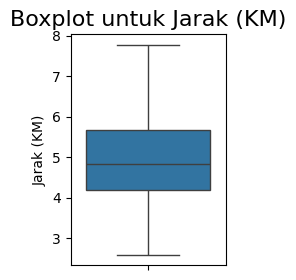

In [46]:
import numpy as np

# Transformasi log untuk mengurangi pengaruh outliers
df_transformed = raw_data.copy()
df_transformed[numeric_columns] = df_transformed[numeric_columns].apply(np.log1p)  # log(1 + x)

for col in numeric_columns:
    plt.figure(figsize=(2, 3))
    sns.boxplot(y=df_transformed[col])
    plt.title(f'Boxplot untuk {col}', fontsize=16)
    plt.show()

In [47]:
raw_data.isnull().sum()

No                  0
Nomor Resi          0
ExtID            1180
Kota Penerima       0
Kantor Asal         0
Kantor Tujuan       1
Bea Dasar           0
Htnb                0
Total               0
Harga Barang       66
Berat Kiriman       0
Produk              0
Tanggal Kirim       0
Isi Kiriman         4
Kota                0
longitude           0
latitude            0
Jarak (KM)          0
dtype: int64

In [48]:
data_cleaned = raw_data.dropna(subset=['Isi Kiriman','Bea Dasar'])
data_cleaned.isnull().sum()

No                  0
Nomor Resi          0
ExtID            1176
Kota Penerima       0
Kantor Asal         0
Kantor Tujuan       1
Bea Dasar           0
Htnb                0
Total               0
Harga Barang       62
Berat Kiriman       0
Produk              0
Tanggal Kirim       0
Isi Kiriman         0
Kota                0
longitude           0
latitude            0
Jarak (KM)          0
dtype: int64

In [49]:
mean_harga = data_cleaned['Harga Barang'].mean()  # Menghitung mean dari kolom "Harga Barang"
data_cleaned['Harga Barang'].fillna(mean_harga, inplace=True)
# data_cleaned = data_cleaned.apply(lambda x: x.fillna(x.mean()), axis=0)
data_cleaned.isnull().sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10236\706130395.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['Harga Barang'].fillna(mean_harga, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10236\706130395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Harga Barang'].fillna(mean_harga, inplace=True)

No                  0
Nomor Resi          0
ExtID            1176
Kota Penerima       0
Kantor Asal         0
Kantor Tujuan       1
Bea Dasar           0
Htnb                0
Total               0
Harga Barang        0
Berat Kiriman       0
Produk              0
Tanggal Kirim       0
Isi Kiriman         0
Kota                0
longitude           0
latitude            0
Jarak (KM)          0
dtype: int64

In [50]:
frequency = data_cleaned['Isi Kiriman'].value_counts()
frequency

Isi Kiriman
DOC                             786
Men Clothes                     390
Mobile & Gadgets                303
Beauty                          288
Mobile & Accessories            235
                               ... 
DOMPET                            1
GELANG KESEHATAN                  1
Tickets, Vouchers & Services      1
mainan                            1
MIE                               1
Name: count, Length: 199, dtype: int64

In [51]:
unique = data_cleaned['Isi Kiriman'].unique()
unique

array(['GIGI', 'OBAT', 'Books & Magazines', 'KOSMETIK', 'DOC',
       'Mobile & Gadgets', 'PERAKATAN DAPUR', 'HERBAL', 'IKAN KERING',
       'SKINCARE', 'SEJADAH', 'Audio', 'KAIN', 'SPM', 'Beauty', 'doc',
       'Women Clothes', 'MANDAI MASAK DAN KERUPUK', 'BAJU', 'gigi',
       'SPERPART KENDRAAN', 'KOPI', 'Food & Beverages', 'KERUDUNG',
       'BUKU', 'aksesoris', 'Health', 'MAKANAN KERING', 'baju', 'KERTAS',
       'KERUPUK', 'SENDAL', 'sepatu', 'kosmetik', 'SPM DA 6605 HL',
       'STNK', 'THERMO LUMINISCENCE DOSEMETER', 'kopi', 'obat', 'MAINAN',
       'KERAJINAN', 'Mom & Baby', 'STROLER', 'BAJU DAN SEPATU',
       'ALAT JAHIT', 'BASRENG', 'PLAT', 'MAKANAN PAKAIAN', 'KITAB',
       'KERUDUNG DAN KOSMETIK', 'GETAH PRESTO', 'TUANGAN KUE',
       'TUPPERWARE', 'Fashion Accessories', 'Beauty & Care',
       'Muslim Fashion', 'PANCI LISTRIK', 'AKSESORIS',
       'KK ASLIDAN KTP ASLI', 'SUSU', 'HP DAN SOVENIR', 'CAIRAN',
       'Sports & Outdoors', 'BIT', 'MAKANAN RINGAN', 'SPAREPART',


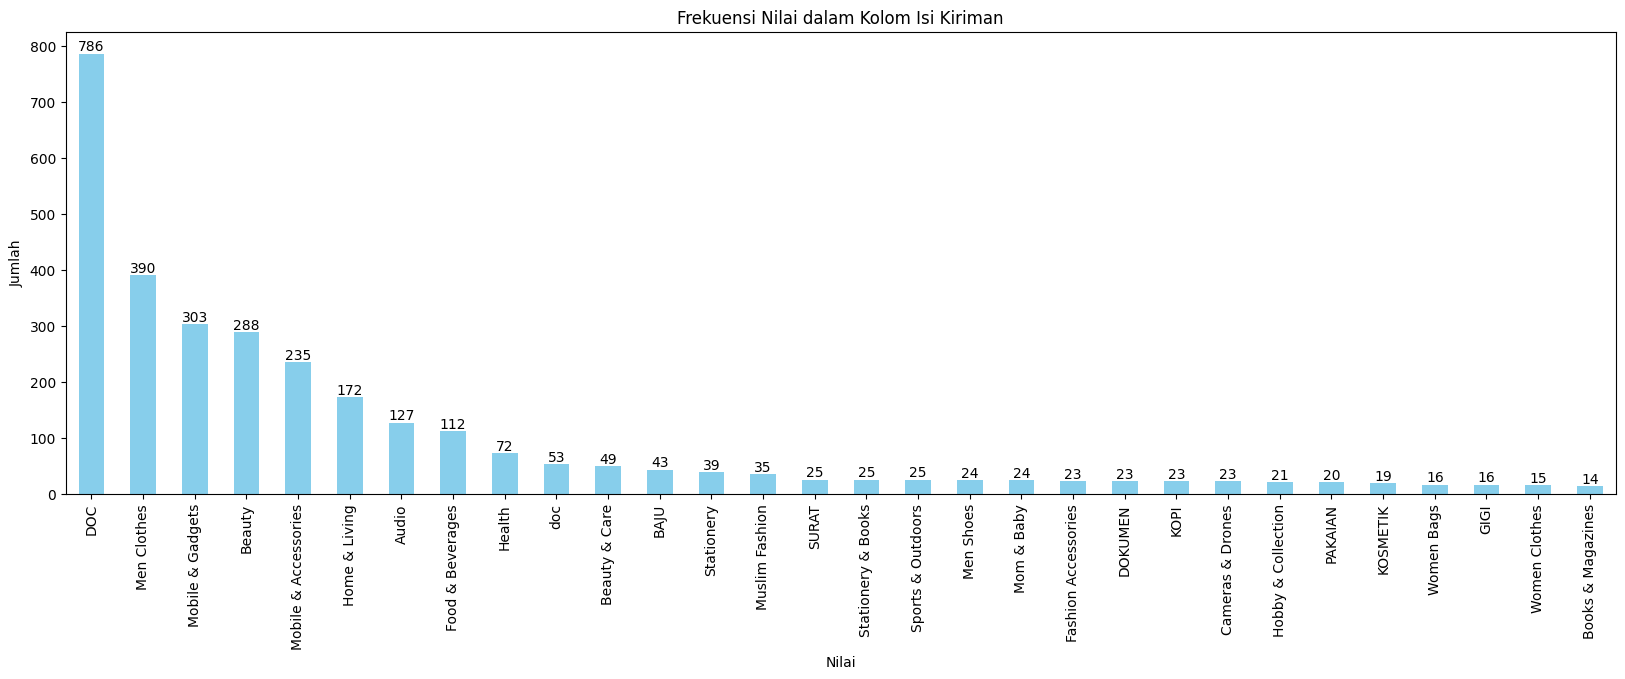

In [52]:
plt.figure(figsize=(20, 6))
ax = frequency.head(30).plot(kind='bar', color='skyblue')

# Menambahkan jumlah di atas setiap bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Frekuensi Nilai dalam Kolom Isi Kiriman')
plt.xlabel('Nilai')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)
plt.show()

In [53]:
total_count = frequency.sum()
total_count

3432

In [71]:
(data_cleaned['Htnb'] == 0).sum()

2219

In [54]:
data_cleaned.shape

(3432, 18)

In [55]:
numeric_columns2 = ['Bea Dasar', 'Htnb', 'Total', 'Harga Barang', 'Berat Kiriman', 'Jarak (KM)','Isi Kiriman']
data_cleaned2 = data_cleaned[numeric_columns2]
# Mengubah 'Isi Kiriman' menjadi one-hot encoding
data_encoded = pd.get_dummies(data_cleaned2, columns=['Isi Kiriman'])
data_encoded.head()

,Bea Dasar,Htnb,Total,Harga Barang,Berat Kiriman,Jarak (KM),Isi Kiriman_1,Isi Kiriman_A,Isi Kiriman_AKSESORIS,Isi Kiriman_ALAT CUKUR,...,Isi Kiriman_doc,Isi Kiriman_dokumen,Isi Kiriman_gigi,Isi Kiriman_kopi,Isi Kiriman_kosmetik,Isi Kiriman_kuekering,Isi Kiriman_mainan,Isi Kiriman_obat,Isi Kiriman_sampel,Isi Kiriman_sepatu
4,"34,000.00",960.00,"34,960.00","400,000.00",1.00,"1,042.30",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,"28,000.00",500.00,"28,500.00","200,000.00",0.50,55.55,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,"19,000.00",0.00,"19,000.00","15,000.00",0.15,59.97,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,"17,000.00","1,920.00","18,920.00","800,000.00",2.60,12.44,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,"18,500.00",500.00,"19,000.00","200,000.00",1.00,123.70,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
# Menghitung korelasi
encode_pearson_corr = data_encoded.corr(method='pearson')['Bea Dasar']
encode_spearman_corr = data_encoded.corr(method='spearman')['Bea Dasar']
encode_kendall_corr = data_encoded.corr(method='kendall')['Bea Dasar']

In [57]:
encode_pearson_corr.sort_values(ascending=False).head(10)

Bea Dasar                    1.00
Total                        1.00
Berat Kiriman                0.82
Harga Barang                 0.74
Htnb                         0.74
Isi Kiriman_SPM              0.70
Isi Kiriman_SPM DA 5477 UI   0.34
Jarak (KM)                   0.25
Isi Kiriman_BIT              0.20
Isi Kiriman_DA 5773 UQ       0.14
Name: Bea Dasar, dtype: float64

In [58]:
encode_pearson_corr.sort_values(ascending=True).head(10)

Isi Kiriman_Mobile & Gadgets       -0.06
Isi Kiriman_Beauty                 -0.05
Isi Kiriman_Mobile & Accessories   -0.05
Isi Kiriman_DOC                    -0.05
Isi Kiriman_Audio                  -0.04
Isi Kiriman_Home & Living          -0.04
Isi Kiriman_Food & Beverages       -0.03
Isi Kiriman_Health                 -0.03
Isi Kiriman_Beauty & Care          -0.03
Isi Kiriman_Mom & Baby             -0.02
Name: Bea Dasar, dtype: float64

In [59]:
encode_spearman_corr.sort_values(ascending=False).head(10)

Bea Dasar                 1.00
Total                     0.99
Jarak (KM)                0.67
Harga Barang              0.47
Berat Kiriman             0.37
Htnb                      0.35
Isi Kiriman_Men Clothes   0.24
Isi Kiriman_BAJU          0.14
Isi Kiriman_DOC           0.09
Isi Kiriman_KOPI          0.09
Name: Bea Dasar, dtype: float64

In [60]:
encode_spearman_corr.sort_values(ascending=True).head(10)

Isi Kiriman_Mobile & Gadgets       -0.18
Isi Kiriman_Beauty                 -0.14
Isi Kiriman_Mobile & Accessories   -0.12
Isi Kiriman_Beauty & Care          -0.11
Isi Kiriman_Audio                  -0.11
Isi Kiriman_Health                 -0.10
Isi Kiriman_Mom & Baby             -0.07
Isi Kiriman_Home & Living          -0.06
Isi Kiriman_Food & Beverages       -0.06
Isi Kiriman_Cameras & Drones       -0.05
Name: Bea Dasar, dtype: float64

In [61]:
encode_kendall_corr.sort_values(ascending=False).head(10)

Bea Dasar                 1.00
Total                     0.98
Jarak (KM)                0.49
Harga Barang              0.35
Htnb                      0.29
Berat Kiriman             0.27
Isi Kiriman_Men Clothes   0.20
Isi Kiriman_BAJU          0.12
Isi Kiriman_DOC           0.08
Isi Kiriman_KOPI          0.07
Name: Bea Dasar, dtype: float64

In [62]:
encode_kendall_corr.sort_values(ascending=True).head(10)

Isi Kiriman_Mobile & Gadgets       -0.15
Isi Kiriman_Beauty                 -0.12
Isi Kiriman_Mobile & Accessories   -0.10
Isi Kiriman_Beauty & Care          -0.09
Isi Kiriman_Audio                  -0.09
Isi Kiriman_Health                 -0.08
Isi Kiriman_Mom & Baby             -0.06
Isi Kiriman_Home & Living          -0.05
Isi Kiriman_Food & Beverages       -0.05
Isi Kiriman_Cameras & Drones       -0.04
Name: Bea Dasar, dtype: float64

In [63]:
# Membuat heatmap untuk melihat korelasi antar variabel numerik
data_cleaned3= data_cleaned2.drop(columns=['Isi Kiriman'])

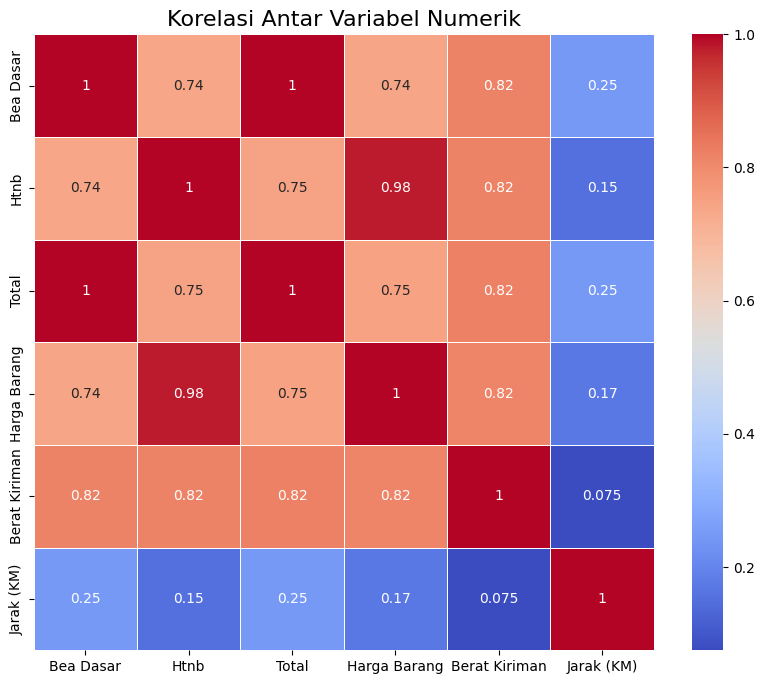

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned3.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antar Variabel Numerik', fontsize=16)
plt.show()

In [65]:
data_cleaned3.head()

,Bea Dasar,Htnb,Total,Harga Barang,Berat Kiriman,Jarak (KM)
4,"34,000.00",960.00,"34,960.00","400,000.00",1.00,"1,042.30"
5,"28,000.00",500.00,"28,500.00","200,000.00",0.50,55.55
6,"19,000.00",0.00,"19,000.00","15,000.00",0.15,59.97
7,"17,000.00","1,920.00","18,920.00","800,000.00",2.60,12.44
8,"18,500.00",500.00,"19,000.00","200,000.00",1.00,123.70


In [66]:
pearson_corr = data_cleaned3.corr(method='pearson')
spearman_corr = data_cleaned3.corr(method='spearman')
kendall_corr = data_cleaned3.corr(method='kendall')


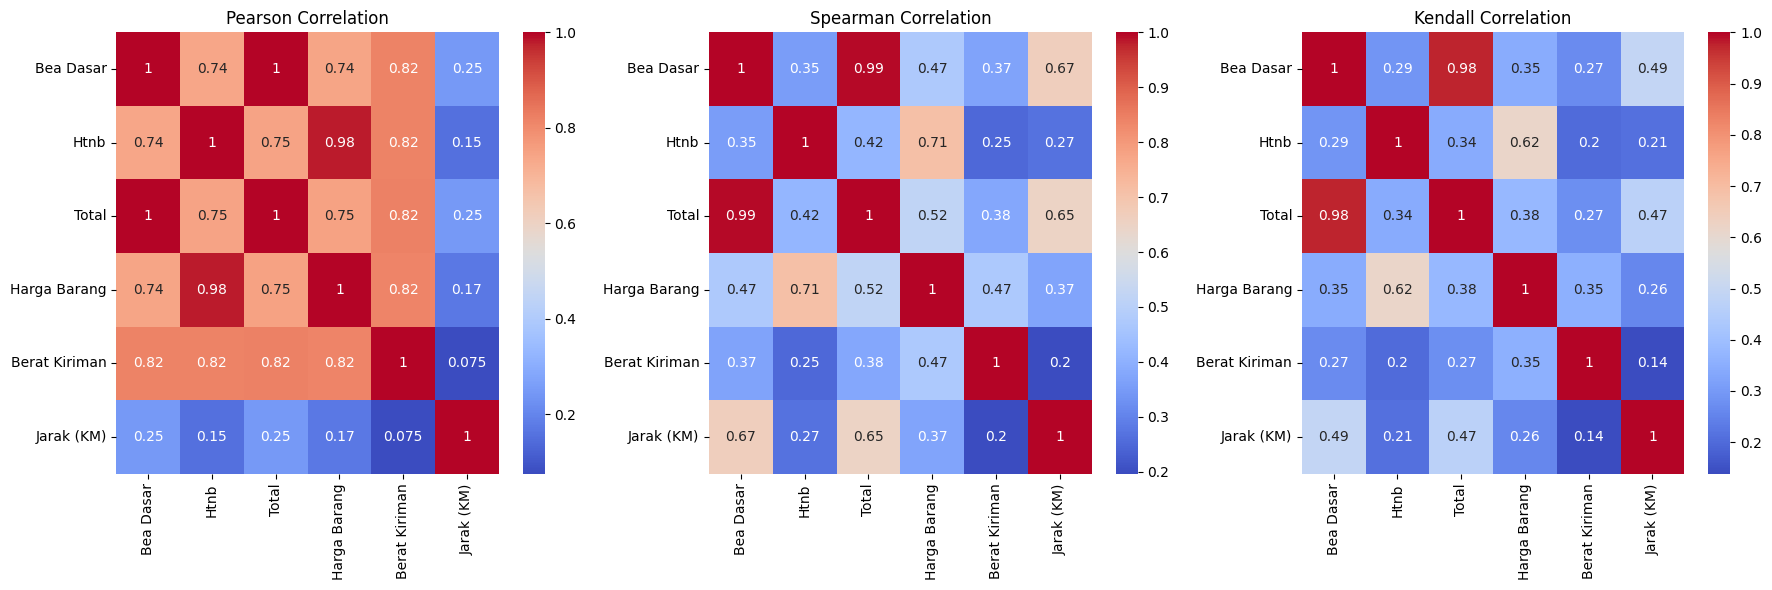

In [67]:
# Membuat figure dan axes untuk 3 heatmap
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Heatmap untuk korelasi Pearson
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Pearson Correlation')

# Heatmap untuk korelasi Spearman
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Spearman Correlation')

# Heatmap untuk korelasi Kendall
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title('Kendall Correlation')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [68]:
data_cleaned3

,Bea Dasar,Htnb,Total,Harga Barang,Berat Kiriman,Jarak (KM)
4,"34,000.00",960.00,"34,960.00","400,000.00",1.00,"1,042.30"
5,"28,000.00",500.00,"28,500.00","200,000.00",0.50,55.55
6,"19,000.00",0.00,"19,000.00","15,000.00",0.15,59.97
7,"17,000.00","1,920.00","18,920.00","800,000.00",2.60,12.44
8,"18,500.00",500.00,"19,000.00","200,000.00",1.00,123.70
...,...,...,...,...,...,...
3431,"9,000.00",0.00,"9,000.00","15,500.00",0.05,123.70
3432,"10,000.00",0.00,"10,000.00","22,500.00",0.05,37.24
3433,"11,000.00",0.00,"11,000.00","38,500.00",0.13,101.14
3434,"7,000.00",0.00,"7,000.00","15,000.00",0.05,12.44


In [69]:
data_cleaned3.isna().sum()

Bea Dasar        0
Htnb             0
Total            0
Harga Barang     0
Berat Kiriman    0
Jarak (KM)       0
dtype: int64